dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


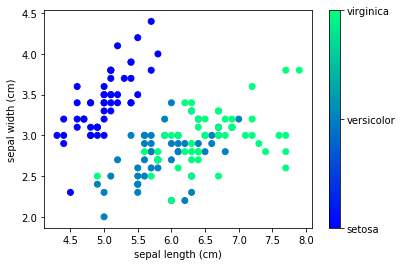

In [12]:
"""
Part 1: HelloWorldML. Reading the Iris Dataset.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Print out the dataset keys, so we know what info we have access to
print(iris.keys())

# Plot two features of the iris flowers
feat1_idx = 0
feat2_idx = 1

plt.scatter(iris.data[:, feat1_idx], iris.data[:, feat2_idx], 
            c=iris.target, cmap=plt.cm.get_cmap('winter'))
def fmt(i, *args):
    return iris.target_names[int(i)]
plt.colorbar(ticks=[0, 1, 2], format=plt.FuncFormatter(fmt))
plt.xlabel(iris.feature_names[feat1_idx])
plt.ylabel(iris.feature_names[feat2_idx])
plt.show()

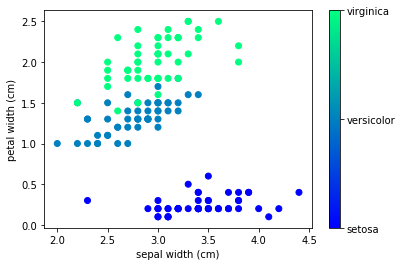

In [13]:
"""
Part 1 Exercises
"""
# Exercise 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Plot two features of the iris flowers that best separates them
feat1_idx = 1
feat2_idx = 3

plt.scatter(iris.data[:, feat1_idx], iris.data[:, feat2_idx], 
            c=iris.target, cmap=plt.cm.get_cmap('winter'))
def fmt(i, *args):
    return iris.target_names[int(i)]
plt.colorbar(ticks=[0, 1, 2], format=plt.FuncFormatter(fmt))
plt.xlabel(iris.feature_names[feat1_idx])
plt.ylabel(iris.feature_names[feat2_idx])
plt.show()

['virginica']


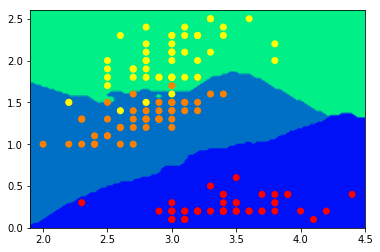

In [15]:
"""
Part 2: Supervised Learning. k-Nearest-Neighbor (k-NN) classification.
"""
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import plotfuncs as pf

# Load the iris set
iris = load_iris()
data, labels = iris.data, iris.target

# Train a model using kNN using some k.
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(data, labels)

# Predict a flower.
result = kNN.predict([[2, 2, 5, 3],])
print(iris.target_names[result])

# Plot the classifier boundaries (use the best 2 features)
feat1_idx = 1
feat2_idx = 3
data = data[:, (feat1_idx, feat2_idx)]
kNN.fit(data, labels)

xx, yy = pf.make_meshgrid(data[:, 0], data[:, 1], 100)
# plt.cm.coolwarm
pf.plot_contours(plt, kNN, xx, yy, cmap=plt.cm.get_cmap('winter')) 
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.get_cmap('autumn'))
plt.show()

# TODO: Calculate the error. What's the best k to use?

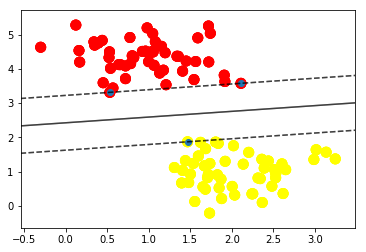

In [18]:
"""
Part 3: Support Vector Classifiers / Machines.
"""
from sklearn.datasets.samples_generator import make_blobs

# Generate random set
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)

# Learn a linear SVC
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot the dataset on a scatterplot
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn');
pf.plot_svc_decision_function(clf)

# Plot the same as the above, but with the support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn');
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
pf.plot_svc_decision_function(clf)
plt.show()


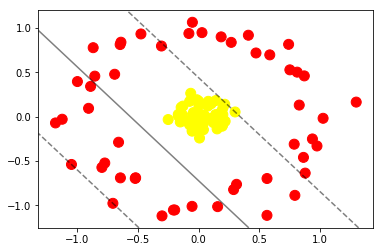

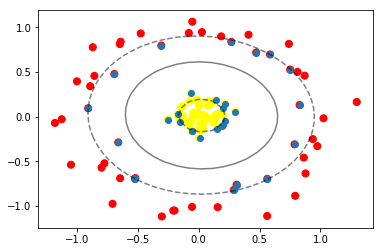

In [22]:
"""
Part 3 (cont.): SVC (kernel methods)
"""
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

# Learn a linear SVC
clf = SVC(kernel='linear').fit(X, y)

# Plot the dataset on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
# Show the SVC decision boundaries
pf.plot_svc_decision_function(clf);
plt.show()

# Learn a SVC with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Plot the dataset on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# Show the SVC decision boundaries, with support vectors
pf.plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
plt.show()


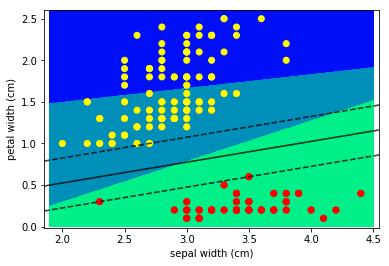

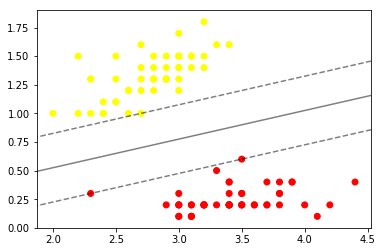

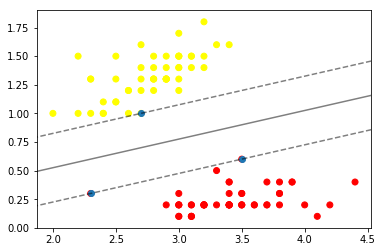

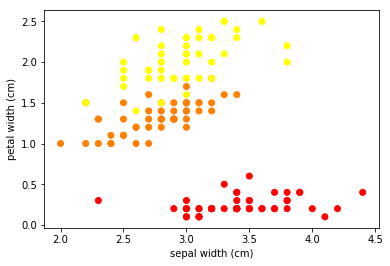

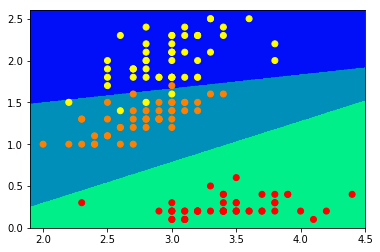

In [24]:
"""
Part 3 Exercises.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import plotfuncs as pf

# Load Iris set
iris = load_iris()
data, labels = iris.data[:100], iris.target[:100]
data = data[:, (1, 3)]
    
# Plot with sepal width / petal width
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()
    
# Exercise 2 - Support Vector Classifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=10) 
clf.fit(data, labels)

# Plot SVC decision
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
pf.plot_svc_decision_function(clf)
plt.show()

# Plot support vectors
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
pf.plot_svc_decision_function(clf)
plt.show()

# Exercise 3 - plot entire dataset
data, labels = iris.data, iris.target
data = data[:, (1, 3)]

# Plot with sepal width / petal width
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()

# Exercise 4 - Support Vector Classifier
clf = SVC(kernel='linear')
clf.fit(data, labels)

# Plot SVC decision
xx, yy = pf.make_meshgrid(data[:, 0], data[:, 1], h=500)
pf.plot_contours(plt, clf, xx, yy, cmap='winter_r')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='autumn');
plt.show()

# TODO: Use SVC to predict the MNIST test set.
# TODO: What are some of the errors in the images?

